<a href="https://colab.research.google.com/github/fabiocalderon/ect2702-ml/blob/master/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# SOM
# from https://www.superdatascience.com/deep-learning/ 


# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Install MiniSOM
# https://github.com/JustGlowing/minisom 
!pip install minisom

  Running setup.py bdist_wheel for minisom ... - done
  Stored in directory: /root/.cache/pip/wheels/4a/5c/75/d21b1b07292ccd8720a8076304f793031e016c16e9c8eacbf9
Successfully built minisom


In [5]:
# Getting Data
import os
import tarfile
from six.moves import urllib

FILE_TO_DOWNLOAD =  "50_Startups.csv"
DOWNLOAD_ROOT = "https://github.com/ect-info/ml/raw/master/"
DATA_PATH = "dados/"
DATA_URL = DOWNLOAD_ROOT + DATA_PATH + FILE_TO_DOWNLOAD

def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)
  urllib.request.urlretrieve(data_url, data_path+file_to_download)
  
  
fetch_data()

# observando se o diretório datasets foi criado com sucesso 
!ls dados

50_Startups.csv


In [20]:
# Importing the dataset
dataset = pd.read_csv(DATA_PATH+FILE_TO_DOWNLOAD , usecols=['R&D Spend','Administration','Marketing Spend','Profit'])

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

dataset.head()



,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [0]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 3, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

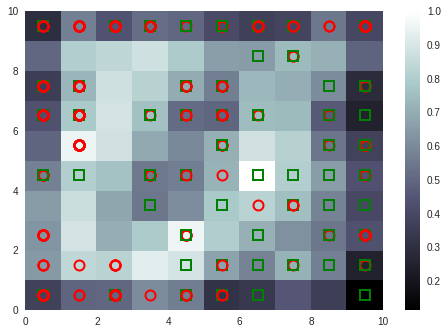

In [0]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()


In [24]:
print(X)

[[1.         0.65174393 1.        ]
 [0.98335946 0.76197173 0.94089337]
 [0.92798459 0.37957895 0.8646636 ]
 [0.87313643 0.51299839 0.81223513]
 [0.85943772 0.30532804 0.77613557]
 [0.797566   0.3694479  0.76912588]
 [0.81412828 0.73016111 0.27071031]
 [0.7880179  0.71745725 0.68649342]
 [0.72901786 0.74173276 0.66049977]
 [0.74590551 0.43692884 0.64644319]
 [0.61635061 0.45150637 0.48573267]
 [0.60884455 0.30836422 0.52936195]
 [0.56766982 0.57883556 0.52956308]
 [0.55635219 0.64106561 0.53555202]
 [0.72539353 0.8013272  0.54370828]
 [0.69261666 0.54302973 0.55486446]
 [0.47180821 0.53527036 0.56031151]
 [0.57246821 0.71401273 0.59894835]
 [0.55488118 0.47877201 0.62511553]
 [0.52264964 0.77823604 0.        ]
 [0.46116861 0.47642362 0.63305328]
 [0.47408436 0.78021012 0.63532724]
 [0.4475048  0.54429273 0.64291963]
 [0.40842369 0.4146383  0.64599195]
 [0.46594728 0.3653876  0.29796428]
 [0.39107967 0.67195793 0.29242745]
 [0.45557444 0.70684477 0.28413435]
 [0.43609283 0.58297807 0.74

In [25]:
help(MiniSom)

Help on class MiniSom in module minisom:

class MiniSom(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, x, y, input_len, sigma=1.0, learning_rate=0.5, decay_function=<function asymptotic_decay at 0x7fd048164510>, neighborhood_function='gaussian', random_seed=None)
 |      Initializes a Self Organizing Maps.
 |      
 |      A rule of thumb to set the size of the grid for a dimensionality
 |      reduction task is that it should contain 5*sqrt(N) neurons
 |      where N is the number of samples in the dataset to analyze.
 |      
 |      E.g. if your dataset has 150 samples, 5*sqrt(150) = 61.23
 |      hence a map 8-by-8 should perform well.
 |      
 |      Parameters
 |      ----------
 |      x : int
 |          x dimension of the SOM.
 |      
 |      y : int
 |          y dimension of the SOM.
 |      
 |      input_len : int
 |          Number of the elements of the vectors in input.
 |      
 |      sigma : float, optional (default=1.0)
 |          Spread of th

In [0]:
print(som.get_weights())


[[[3.09874719e-01 3.80945976e-02 2.98417373e-01 ... 5.62458631e-01
   8.02462088e-02 1.48232005e-03]
  [3.43853606e-01 2.00382730e-01 2.63878901e-01 ... 4.81722730e-01
   9.01006639e-02 8.20901145e-04]
  [3.71604639e-01 2.02782893e-01 1.96006359e-01 ... 3.76654482e-01
   7.47187810e-02 5.18418620e-04]
  ...
  [2.23194755e-01 6.04685729e-01 1.68424721e-01 ... 2.00698149e-01
   7.24931295e-02 1.36456641e-03]
  [2.39913212e-01 6.69762338e-01 1.83570998e-01 ... 2.15859400e-01
   8.75942129e-02 2.93104663e-03]
  [2.34411922e-01 7.51780816e-01 2.35237700e-01 ... 3.32829070e-01
   6.79930710e-02 3.59322872e-03]]

 [[2.97511666e-01 5.22502203e-06 2.10987251e-01 ... 4.58857704e-01
   9.08480792e-02 1.58355899e-03]
  [3.22532682e-01 7.58033646e-02 2.01448846e-01 ... 4.16973030e-01
   7.75698506e-02 9.50016271e-04]
  [3.95674759e-01 1.29302474e-01 1.63782084e-01 ... 3.84602781e-01
   6.92703653e-02 5.63232572e-04]
  ...
  [3.61427506e-01 5.98404478e-01 1.52653232e-01 ... 1.69903611e-01
   6.18817